# Задача №13 Визуализация ленты Мёбиуса.

## Ле́нта Мёбиуса (лист Мёбиуса, петля́ Мёбиуса) — топологический объект, простейшая неориентируемая поверхность с краем

#### Лента Мёбиуса похожа на полоску бумаги, склеенную в петлю с полукручиванием. Топологически это довольно интересно, потому что, несмотря на внешность, у него есть только одна сторона!

Этот объект мы будем визуализировать используя трехмерные инструменты **_Matplotlib_**

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

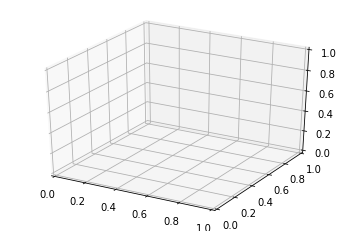

In [2]:
ax = plt.axes(projection='3d')

__projection='3d'__ - ключевое слово для создания трехмерных осей

Ключ к созданию полоски Мёбиуса - подумать о ее параметризации: это двумерная полоса, поэтому нам нужны два внутренних измерения. Давайте назовем их θ (тета), которая колеблется от 0 до 2π вокруг петли, и w, которая варьируется от -0.25 до 0.25 по ширине полосы:

In [3]:
theta  = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 30)
w, theta = np.meshgrid(w, theta)

Функция **linspace(start, stop, num)** пакета _numpy_ возвращает одномерный массив длиной __num__, значения которых равномерно распределенны от __start__ до __stop__.

Функция **meshgrid()** создает список массивов координатных сеток N-мерного координатного пространства для указанных одномерных массивов координатных векторов. Координатное пространство - это пространство N-мерных точек-координат, причем каждой точке в таком пространстве соответствует комбинация одного значения из каждого координатного массива.

Рассматривая рисунок листа Мёбиуса, мы могли бы заметить, что происходит два поворота:
1. Положение петли вокруг ее центра (то, что мы назвали θ)
2. Скручивание полосы вокруг своей оси (мы назовем это ϕ (фи)).

Для ленты Мёбиуса мы должны иметь полосу, делающую половину скручивания во время полного цикла, или Δϕ = Δθ / 2.

In [4]:
phi = 0.5 * theta

Теперь воспользуемся основным правилом МатАнализа
> Притворимся, что знаем тригонометрию.

Мы определим **r** - расстояние каждой точки от центра, и используем это, чтобы найти _(x, y, z)_ координаты:

In [5]:
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Функция **ravel()** возвращает сжатый до одной оси массив.

(-1, 1)

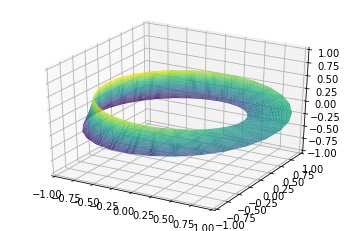

In [6]:
from matplotlib.tri import Triangulation

tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')

ax.plot_trisurf(
    x, y, z, 
    triangles=tri.triangles,
    cmap='viridis', 
    linewidths=0.2
)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)